# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [32]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [34]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,162,98,39,81,191,64,9,166,40,20,138,184,415,131,62,8,19,197,205
1,218,83,44,68,144,61,8,147,45,19,143,170,325,180,74,1,1,185,191
2,666,102,43,96,197,63,10,185,36,22,142,202,513,139,65,8,12,195,204
3,717,96,46,74,202,74,5,163,39,20,149,185,408,191,70,7,8,196,200
4,457,83,45,73,161,68,8,142,46,18,144,169,305,179,71,10,3,191,199
5,732,85,45,73,167,69,8,143,46,18,148,173,307,176,71,2,0,190,199
6,633,102,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
7,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
8,143,80,43,68,120,54,8,150,45,19,145,171,329,176,85,4,8,179,183
9,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193


Methods `describe` and `info` deliver some useful information.

In [35]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.998179,93.659381,44.947177,82.085610,168.765027,61.743169,8.714026,169.051002,40.885246,20.588342,148.424408,189.051002,440.881603,174.961749,72.766849,6.413479,12.628415,188.805100,195.422587
std,244.007968,8.091550,6.079082,15.505178,33.515404,8.289337,4.828085,33.203711,7.742169,2.596659,14.481936,31.525177,177.408089,32.349545,7.666659,4.713148,8.770825,6.121362,7.379440
min,1.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,167.000000,319.000000,150.000000,68.000000,3.000000,6.000000,184.000000,191.000000
50%,418.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,629.000000,99.000000,50.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,586.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [36]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [37]:
### YOUR CODE HERE
# просто центртруем и нормализуем
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)  
transformer.transform(X_train)
transformer.transform(X_test)

array([[-0.69732647, -1.07115174, -1.80243679, ...,  0.84123304,
        -0.62217699, -0.87112899],
       [-0.5906754 , -0.8237549 , -0.15595127, ..., -1.3270155 ,
         0.84942498,  0.75649375],
       [ 0.17228998,  1.52651516,  1.16123715, ...,  0.49887801,
         0.84942498,  0.75649375],
       ...,
       [ 0.13127033,  0.04213407, -1.30849113, ..., -0.75642378,
         1.5034703 ,  1.16339943],
       [-1.09521702, -0.08156435, -1.63778824, ...,  1.98241648,
         2.32102696,  1.9772108 ],
       [ 0.29534891,  0.41322934,  0.00869728, ..., -0.07171371,
         1.5034703 ,  1.43466989]])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

[0.80909091 0.73636364 0.73636364 0.75454545 0.69724771]
[0.80909091 0.73636364 0.73636364 0.75454545 0.69724771]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

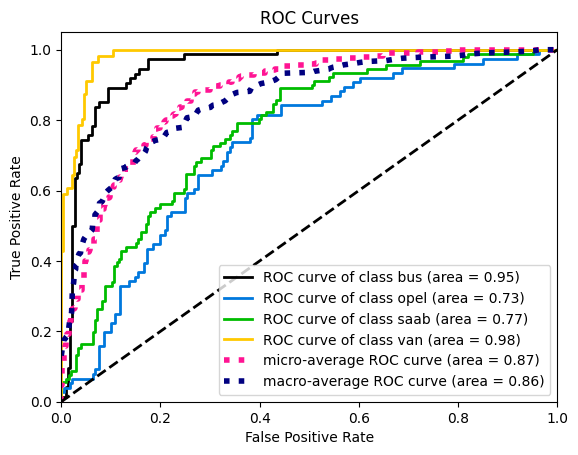

In [38]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import scikitplot
from sklearn.model_selection import cross_validate

clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=('accuracy', 'f1_micro'), return_train_score=True)

print(scores['test_accuracy'])
print(scores['test_f1_micro'])

clf.fit(X_train, y_train)
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

In [39]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

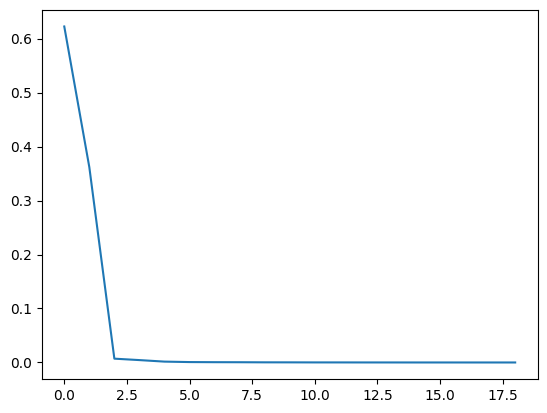

In [40]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [41]:
### YOUR CODE HERE
# 12 - на основе графика выше
pca = PCA(n_components=12)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

[0.70909091 0.70909091 0.70909091 0.74545455 0.66972477]
[0.70909091 0.70909091 0.70909091 0.74545455 0.66972477]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

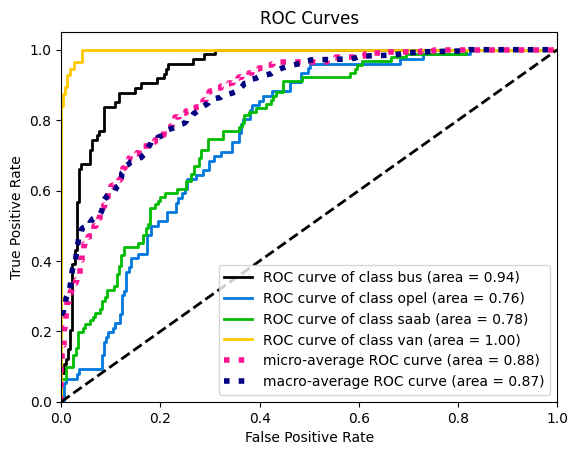

In [42]:
### YOUR CODE HERE

clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=('accuracy', 'f1_micro'), return_train_score=True)

print(scores['test_accuracy'])
print(scores['test_f1_micro'])

clf.fit(X_train, y_train)
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

Сократили данные, но хуже особо не стало

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 20}
0.6801346801346801
0.6801346801346801


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

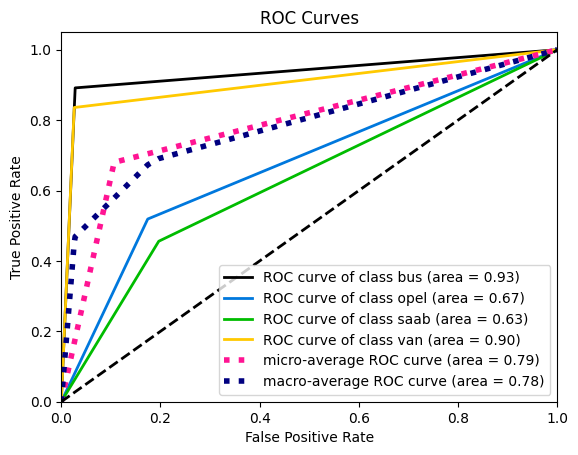

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# YOUR CODE HERE

clf = DecisionTreeClassifier()
scores = GridSearchCV(clf, { 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] })
scores.fit(X_train, y_train)
print(scores.best_params_)

clf = DecisionTreeClassifier(max_depth=scores.best_params_['max_depth']).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))

scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE